# Rank tests - Previous 15m test data

In [133]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import re

In [134]:
USER = os.getenv("USER")
PATH = f"/Users/{USER}/Documents/MASTER-THESIS/datasets/master_thesis_git/"

# Device 6 Analysis

## Load data

In [180]:
FOLDER = "old_test_data__device_6_analysis/"
FULL_PATH = PATH + "rank_tests/" + FOLDER
i = 30
data_results = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES:
    model_start = re.search("cnn_110_", FILE).end()
    model_end = re.search(".npy", FILE).start()
    MODEL = FILE[model_start:model_end]
    
    device_start = re.search("device-", FILE).end()
    device_end = re.search("-epoch", FILE).start()
    DEVICE = FILE[device_start:device_end]
    
    epoch_start = re.search("epoch-", FILE).end()
    epoch_end = re.search("-keybyte", FILE).start()
    EPOCH = FILE[epoch_start:epoch_end]
    
    #print(FILE)
    FILE_NAME = f"d{DEVICE} e{EPOCH} {MODEL}"
    data_results[FILE_NAME] = np.load(FULL_PATH + FILE, allow_pickle=True)
    i+=5

data_results.describe()

,d10 e100 GWN_0_04_hidden_layer,d6 e100 GWN_0_03,d6 e100 rayleigh_noise_0_0138,d6 e100 rayleigh_noise_0_0276,d6 e40 No_noise,d6 e50 GWN_0_01,d6 e50 GWN_0_02,d6 e50 GWN_0_03,d6 e50 GWN_0_04,d6 e50 GWN_0_04_hidden_layer,d6 e50 GWN_0_05,d6 e50 No_noise,d6 e50 collected_noise_105_scaling,d6 e50 collected_noise_25_scaling,d6 e50 collected_noise_25_scaling_no_mean_adjustment,d6 e50 collected_noise_50_scaling_no_mean_adjustment,d6 e50 collected_noise_75_scaling,d6 e50 rayleigh_noise_0_0138
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,210.010000,364.940000,498.790000,467.100000,773.64000,502.840000,416.520000,363.790000,356.060000,362.590000,470.44000,732.920000,707.19000,564.060000,423.830000,411.510000,500.150000,433.370000
std,23.574295,46.894427,66.945975,63.060257,98.29789,65.034369,49.605612,45.901144,45.169003,43.658013,58.32447,91.623481,88.42239,66.432288,52.209766,54.523926,68.252706,57.716068
min,141.000000,263.000000,338.000000,327.000000,567.00000,357.000000,283.000000,232.000000,234.000000,266.000000,344.00000,507.000000,531.00000,392.000000,292.000000,219.000000,315.000000,291.000000
25%,194.750000,328.000000,451.750000,423.000000,710.50000,458.750000,385.000000,330.250000,325.500000,328.750000,430.25000,665.750000,641.75000,520.000000,388.000000,374.000000,455.750000,393.000000
50%,209.000000,366.000000,498.500000,471.500000,781.50000,500.000000,421.500000,363.000000,351.500000,362.500000,464.00000,724.500000,706.50000,563.500000,422.500000,412.500000,505.500000,424.000000
75%,225.250000,399.250000,547.000000,510.250000,837.25000,551.500000,450.000000,396.500000,389.250000,399.500000,511.25000,796.750000,767.50000,604.000000,449.000000,449.000000,544.000000,467.500000
max,268.000000,474.000000,778.000000,615.000000,988.00000,687.000000,541.000000,474.000000,448.000000,484.000000,595.00000,942.000000,924.00000,774.000000,555.000000,548.000000,641.000000,655.000000


## Histogram plots (No noise, GWN, Collected, Rayleigh)

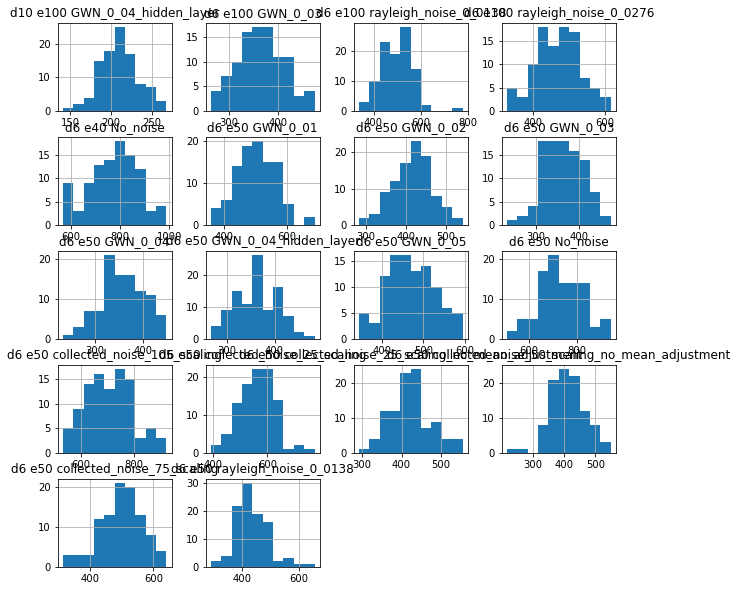

In [136]:
#plt.hist(data_results, bins=1)
data_results.hist(figsize=(10,10))
plt.show()

d10 e100 GWN_0_04_hidden_layer


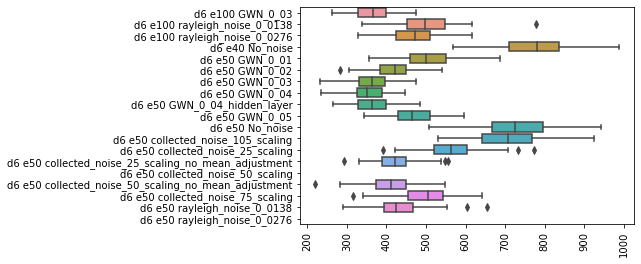

In [137]:
%matplotlib inline
data = data_results.copy()
print(data.columns[0])
data = data.drop(columns="d10 e100 GWN_0_04_hidden_layer")
ax = sns.boxplot(data=data, orient="h")
plt.xticks(rotation=90)
plt.show()

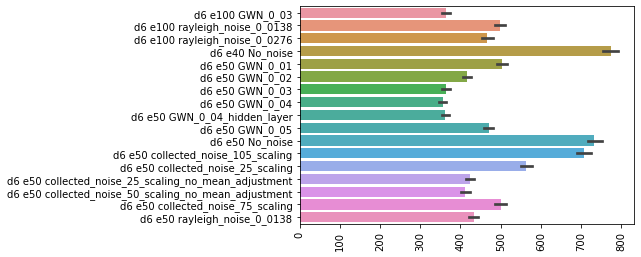

In [138]:
%matplotlib inline
data = data_results.copy()
data = data.drop(columns=["d10 e100 GWN_0_04_hidden_layer", "d6 e50 collected_noise_50_scaling", "d6 e50 rayleigh_noise_0_0276"])
ax = sns.barplot(data=data, orient="h")
plt.xticks(rotation=90)
plt.show()

# Epoch comparison

## GWN 0.04 Hidden layer - Epochs

In [139]:
USER = os.getenv("USER")
PATH = f"/Users/{USER}/Documents/MASTER-THESIS/datasets/master_thesis_git/"

In [140]:
FOLDER = "epoch_analysis_GWN_0_04_hidden_layer/"
FULL_PATH = PATH + "rank_tests/" + FOLDER
i = 30
df = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES:
    #print(FILE)
    df[f"{i}"] = np.load(FULL_PATH + FILE)
    i+=5

df.describe()

,30,35,40,45,50,55,60,65,70,75,80,85,90,95
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,626.800000,509.350000,421.200000,390.750000,363.350000,381.050000,376.800000,376.15000,381.70000,411.500000,422.950000,377.100000,462.700000,482.350000
std,78.320932,57.509976,51.407147,47.092155,39.196234,52.341465,39.604093,45.77781,52.08202,49.669963,52.066228,48.409329,43.923498,73.288381
min,490.000000,388.000000,337.000000,332.000000,284.000000,324.000000,306.000000,259.00000,300.00000,299.000000,342.000000,288.000000,385.000000,308.000000
25%,565.500000,467.000000,386.750000,356.000000,336.000000,340.500000,354.500000,357.50000,335.25000,383.750000,377.750000,341.000000,427.750000,438.000000
50%,624.500000,528.500000,415.500000,381.500000,372.000000,371.500000,384.500000,381.00000,381.50000,416.500000,425.000000,384.000000,469.000000,494.000000
75%,673.500000,549.500000,458.250000,416.500000,383.750000,395.500000,395.750000,402.75000,406.25000,435.250000,466.500000,410.500000,492.250000,534.000000
max,799.000000,585.000000,529.000000,506.000000,428.000000,514.000000,470.000000,466.00000,512.00000,500.000000,512.000000,456.000000,542.000000,634.000000


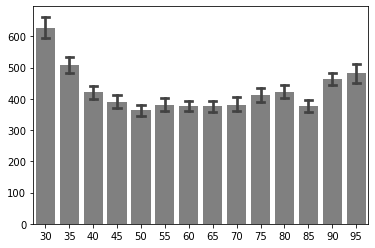

In [141]:
ax = sns.barplot(
    data=df, 
    #palette="Greys", 
    color="grey",
    capsize=0.3,
)

## Raigleigh 0.0138 - Epochs

In [142]:
FOLDER = "epoch_analysis_rayleigh_noise_0138/"

FULL_PATH = PATH + "rank_tests/" + FOLDER
i = 40
df = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES[1:]:
    #print(FILE)
    df[f"{i}"] = np.load(FULL_PATH + FILE)
    i+=5

df[f"{100}"] = np.load(FULL_PATH + FILES[0])
df.describe()

,40,45,50,55,60,65,70,75,80,85,90,95,100
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000
mean,454.950000,432.350000,435.600000,460.300000,448.150000,452.55000,459.300000,477.400000,486.750000,474.700000,449.25000,477.500000,478.300000
std,52.949305,65.018439,57.326764,54.782921,62.566407,67.65351,49.806045,69.131758,63.661006,44.885937,50.64414,67.244644,59.913183
min,355.000000,327.000000,347.000000,368.000000,359.000000,340.00000,355.000000,378.000000,405.000000,402.000000,394.00000,348.000000,359.000000
25%,418.500000,383.750000,389.000000,428.000000,401.250000,391.00000,434.750000,430.500000,426.250000,447.000000,413.00000,442.500000,432.250000
50%,448.500000,436.500000,456.500000,458.500000,438.500000,473.50000,453.000000,475.000000,491.500000,479.000000,433.00000,469.000000,486.000000
75%,494.000000,477.500000,478.500000,492.500000,499.250000,501.75000,490.500000,517.000000,536.500000,496.500000,469.25000,507.750000,510.750000
max,553.000000,543.000000,520.000000,590.000000,564.000000,583.00000,563.000000,654.000000,627.000000,579.000000,583.00000,609.000000,602.000000


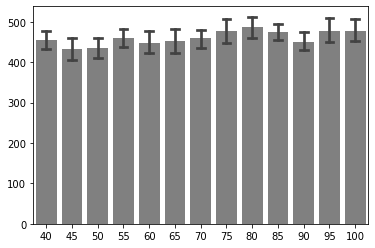

In [143]:
ax = sns.barplot(
    data=df, 
    #palette="Greys", 
    color="grey",
    capsize=0.3,
)

## Collected noise x50 - Epoch

In [144]:
FOLDER = "epoch_analysis_collected_50/"

FULL_PATH = PATH + "rank_tests/" + FOLDER
i = 50
df = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES[1:]:
    #print(FILE)
    df[f"{i}"] = np.load(FULL_PATH + FILE)
    i+=5

df[f"{100}"] = np.load(FULL_PATH + FILES[0])
df.describe()

,50,55,60,65,70,75,80,85,90,95,100
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,421.500000,435.250000,433.950000,401.600000,431.750000,405.400000,407.600000,424.400000,413.100000,415.450000,432.200000
std,43.543686,48.158592,54.022875,75.394681,57.817203,49.715401,67.932939,47.266768,57.822687,58.732646,50.399039
min,363.000000,330.000000,322.000000,315.000000,353.000000,317.000000,288.000000,335.000000,326.000000,338.000000,342.000000
25%,390.000000,407.000000,411.000000,346.750000,399.250000,382.000000,356.750000,389.000000,367.750000,379.500000,410.750000
50%,414.000000,432.500000,417.000000,377.500000,427.500000,406.500000,408.000000,423.000000,417.000000,404.500000,424.000000
75%,449.000000,469.250000,460.000000,438.000000,448.750000,449.000000,462.750000,454.500000,467.250000,446.750000,462.500000
max,516.000000,514.000000,552.000000,616.000000,602.000000,480.000000,523.000000,510.000000,502.000000,586.000000,545.000000


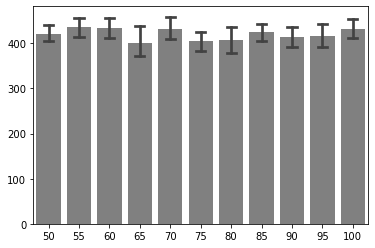

In [145]:
ax = sns.barplot(
    data=df, 
    #palette="Greys", 
    color="grey",
    capsize=0.3,
)

<ipython-input-182-54ae866e4be5>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('131')
<ipython-input-182-54ae866e4be5>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('132')
<ipython-input-182-54ae866e4be5>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('133')


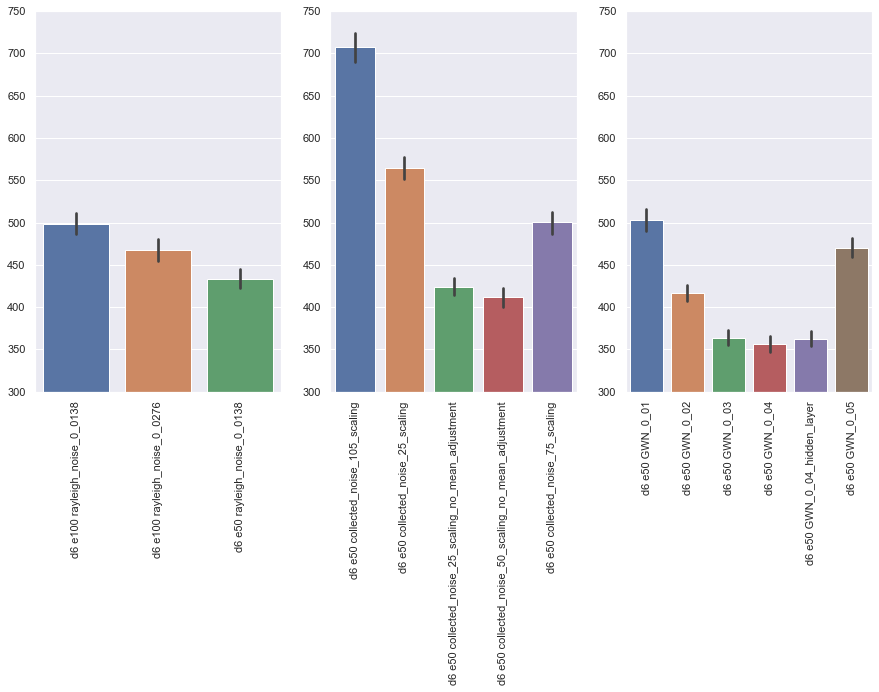

In [182]:
ylim_bottom = 300
ylim_top = 750
sns.set(rc={"figure.figsize":(15, 7)})
plt.subplot('131')
ax = sns.barplot(data=data_results.loc[:, data_results.columns.str.contains('rayleigh')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.subplot('132')
ax = sns.barplot(data=data_results.loc[:, data_results.columns.str.contains('collected')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.subplot('133')
ax = sns.barplot(data=data_results.loc[:, data_results.columns.str.contains('d6 e50 GWN')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.show()

In [187]:
FOLDER = "analysis_devices/"
FULL_PATH = PATH + "rank_tests/" + FOLDER
i = 30
device_data = pd.DataFrame()
FILES = os.listdir(FULL_PATH)
FILES.sort()
for FILE in FILES:
    model_start = re.search("cnn_110-", FILE).end()
    model_end = re.search(".npy", FILE).start()
    MODEL = FILE[model_start:model_end]
    
    device_start = re.search("device-", FILE).end()
    device_end = re.search("-epoch", FILE).start()
    DEVICE = FILE[device_start:device_end]
    
    epoch_start = re.search("epoch-", FILE).end()
    epoch_end = re.search("-keybyte", FILE).start()
    EPOCH = FILE[epoch_start:epoch_end]
    
    #print(FILE)
    FILE_NAME = f"d{DEVICE} e{EPOCH} {MODEL}"
    device_data[FILE_NAME] = np.load(FULL_PATH + FILE, allow_pickle=True)
    i+=5

device_data.describe()

,d7 e65 GWN_0_04,d7 e65 collected_noise_50_scaling_no_mean_adjustment,d7 e65 rayleigh_noise_0_0138,d8 e65 GWN_0_04,d8 e65 collected_noise_50_scaling_no_mean_adjustment,d8 e65 rayleigh_noise_0_0138,d9 e65 GWN_0_04,d9 e65 collected_noise_50_scaling_no_mean_adjustment,d9 e65 rayleigh_noise_0_0138
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,339.300000,410.490000,439.450000,320.180000,318.650000,340.730000,528.030000,469.510000,540.580000
std,42.800335,49.760537,60.276195,39.603943,39.894653,42.123161,70.937226,54.111649,65.378336
min,199.000000,291.000000,282.000000,224.000000,230.000000,249.000000,356.000000,332.000000,388.000000
25%,312.750000,379.750000,399.500000,292.250000,291.000000,312.000000,479.750000,433.750000,498.750000
50%,341.500000,403.500000,433.000000,320.000000,318.000000,338.000000,522.500000,468.500000,543.500000
75%,366.750000,434.250000,473.250000,346.000000,345.000000,370.250000,576.250000,497.250000,584.000000
max,457.000000,559.000000,613.000000,440.000000,420.000000,439.000000,719.000000,629.000000,680.000000


<ipython-input-190-1c2fb041c557>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('131')
<ipython-input-190-1c2fb041c557>:8: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('132')
<ipython-input-190-1c2fb041c557>:12: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot('133')


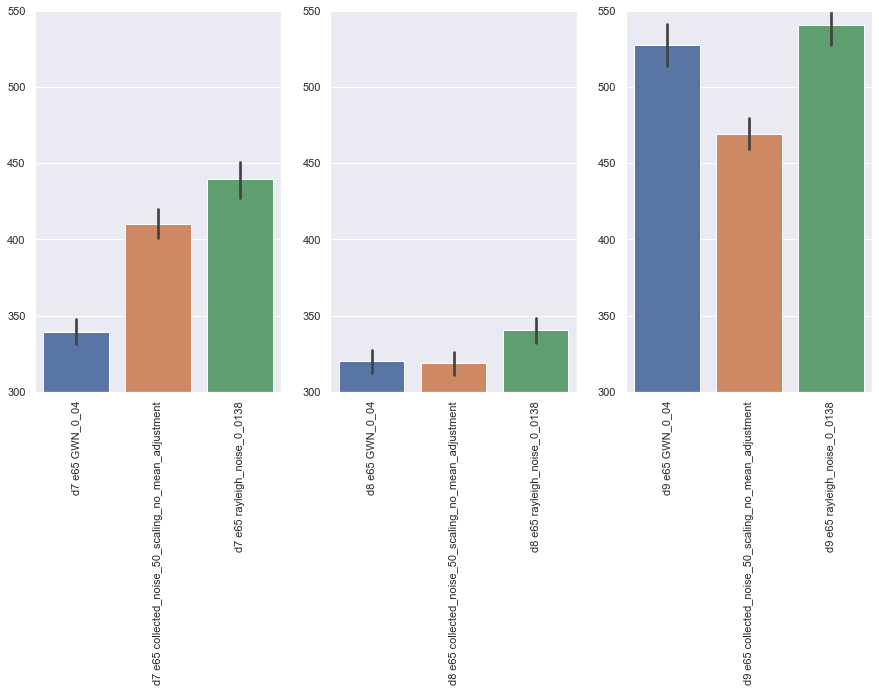

In [190]:
ylim_bottom = 300
ylim_top = 550
sns.set(rc={"figure.figsize":(15, 7)})
plt.subplot('131')
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d7')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.subplot('132')
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d8')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.subplot('133')
ax = sns.barplot(data=device_data.loc[:, device_data.columns.str.contains('d9')])
plt.ylim(ylim_bottom,ylim_top)
plt.xticks(rotation=90)
plt.show()